In [13]:
import altair as alt
alt.renderers.enable('notebook')
import numpy as np
import os
from vega_datasets import data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
weather = pd.read_csv('weather.csv')

In [14]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
MinTemp          366 non-null float64
MaxTemp          366 non-null float64
Rainfall         366 non-null float64
Evaporation      366 non-null float64
Sunshine         363 non-null float64
WindGustDir      363 non-null object
WindGustSpeed    364 non-null float64
WindDir9am       335 non-null object
WindDir3pm       365 non-null object
WindSpeed9am     359 non-null float64
WindSpeed3pm     366 non-null int64
Humidity9am      366 non-null int64
Humidity3pm      366 non-null int64
Pressure9am      366 non-null float64
Pressure3pm      366 non-null float64
Cloud9am         366 non-null int64
Cloud3pm         366 non-null int64
Temp9am          366 non-null float64
Temp3pm          366 non-null float64
RainToday        366 non-null object
RISK_MM          366 non-null float64
RainTomorrow     366 non-null object
dtypes: float64(12), int64(5), object(5)
memory usage: 63.0+ KB


In [15]:
weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [16]:
weather.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [17]:
weather_num = weather.select_dtypes(include=['float64']) #numerical data types
weather_cat = weather.select_dtypes(include=['object']) #categorical data types

In [18]:
weather_num.head(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,1019.7,1015.0,14.4,23.6,3.6
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,1012.4,1008.4,17.5,25.7,3.6


In [19]:
weather_cat.head(2)

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,NW,SW,NW,No,Yes
1,ENE,E,W,Yes,Yes


In [20]:
#Encoding RainToday
print('before',weather.loc[:,'RainToday'].unique())
import numpy as np
weather_num.loc[:,'RainToday'] = np.where(weather.RainToday == 'Yes', 1, 0)
print('after',weather_num.loc[:,'RainToday'].unique())

before ['No' 'Yes']
after [0 1]


C:\Users\BIG1KOR\AppData\Local\Continuum\anaconda3\envs\py35\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\BIG1KOR\AppData\Local\Continuum\anaconda3\envs\py35\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [21]:
#Encoding RainTommorrow
print('before',weather.loc[:,'RainTomorrow'].unique())
import numpy as np
weather_num.loc[:,'RainTomorrow'] = np.where(weather.RainTomorrow == 'Yes', 1, 0)
print('after',weather_num.loc[:,'RainTomorrow'].unique())

before ['Yes' 'No']
after [1 0]


C:\Users\BIG1KOR\AppData\Local\Continuum\anaconda3\envs\py35\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\BIG1KOR\AppData\Local\Continuum\anaconda3\envs\py35\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [22]:
weather_cat.WindGustDir.unique()

array(['NW', 'ENE', 'SSE', 'SE', 'E', 'S', 'N', 'WNW', 'ESE', 'NE', 'NNE',
       'NNW', 'SW', 'W', 'WSW', 'SSW', nan], dtype=object)

In [23]:
from vega_datasets import data

source = data.barley()

source.head(10)

,site,variety,year,yield
0,University Farm,Manchuria,1931,27.00000
1,Waseca,Manchuria,1931,48.86667
2,Morris,Manchuria,1931,27.43334
3,Crookston,Manchuria,1931,39.93333
4,Grand Rapids,Manchuria,1931,32.96667
5,Duluth,Manchuria,1931,28.96667
6,University Farm,Glabron,1931,43.06666
7,Waseca,Glabron,1931,55.20000
8,Morris,Glabron,1931,28.76667
9,Crookston,Glabron,1931,38.13333


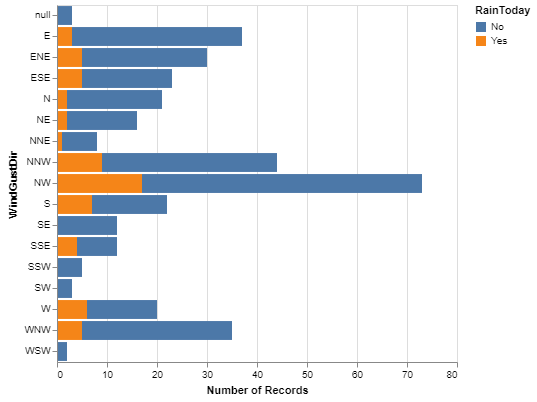

In [25]:
import altair as alt

alt.Chart(weather_cat).mark_bar().encode(
    x='count(RainToday)',
    y='WindGustDir',
    color='RainToday'
)

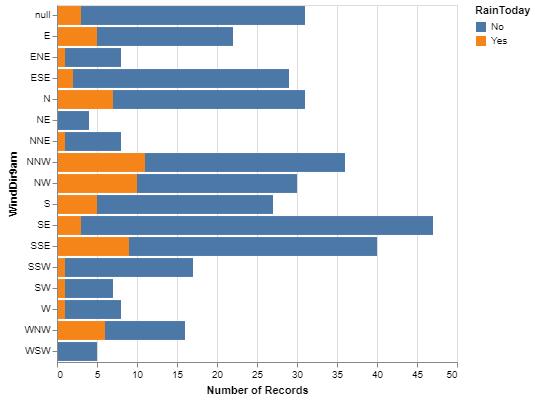

In [26]:
alt.Chart(weather_cat).mark_bar().encode(
    x='count(RainToday)',
    y='WindDir9am',
    color='RainToday'
)

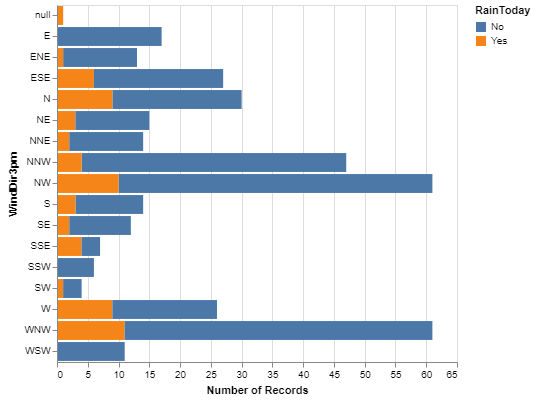

In [27]:
alt.Chart(weather_cat).mark_bar().encode(
    x='count(RainToday)',
    y='WindDir3pm',
    color='RainToday'
)

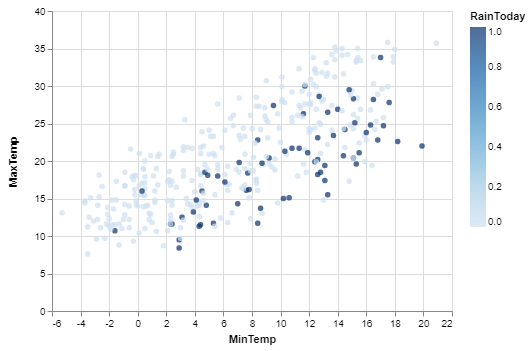

In [28]:
alt.Chart(weather_num).mark_circle().encode(
    x='MinTemp',
    y='MaxTemp',
    color='RainToday'
)

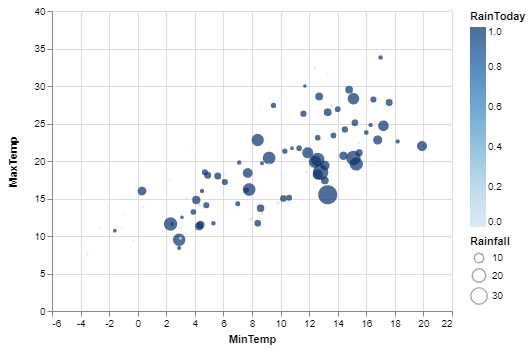

In [29]:
alt.Chart(weather_num).mark_circle().encode(
    x='MinTemp',
    y='MaxTemp',
    color='RainToday',
    size='Rainfall'
)

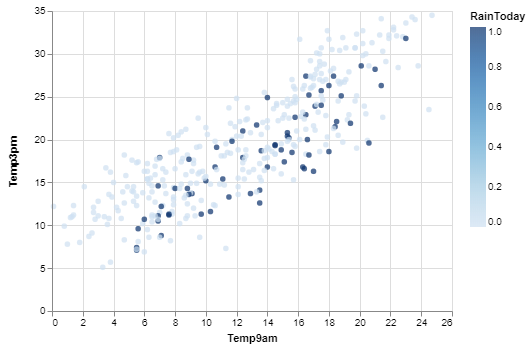

In [30]:
alt.Chart(weather_num).mark_circle().encode(
    x='Temp9am',
    y='Temp3pm',
    color='RainToday'
)

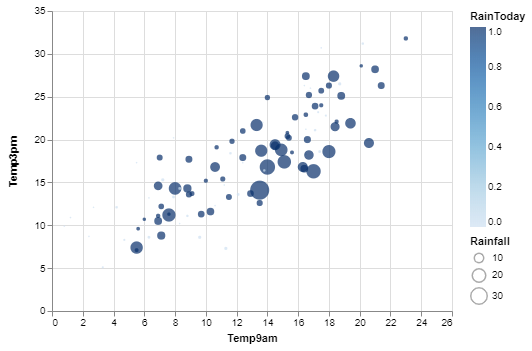

In [31]:
alt.Chart(weather_num).mark_circle().encode(
    x='Temp9am',
    y='Temp3pm',
    color='RainToday',
    size='Rainfall'
)

In [32]:
weather_num.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'Pressure9am', 'Pressure3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM', 'RainToday', 'RainTomorrow'],
      dtype='object')

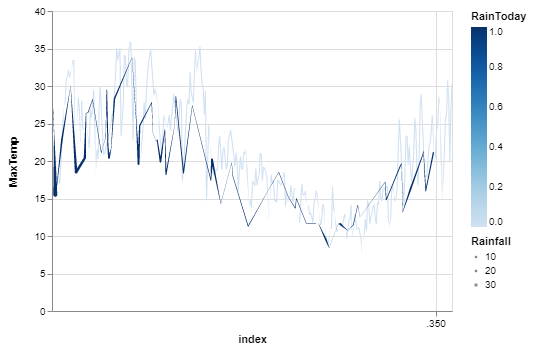

In [33]:
alt.Chart(weather_num.reset_index()).mark_trail().encode(
    x='index:T',
    y='MaxTemp:Q',
    color='RainToday',
    size='Rainfall'
)

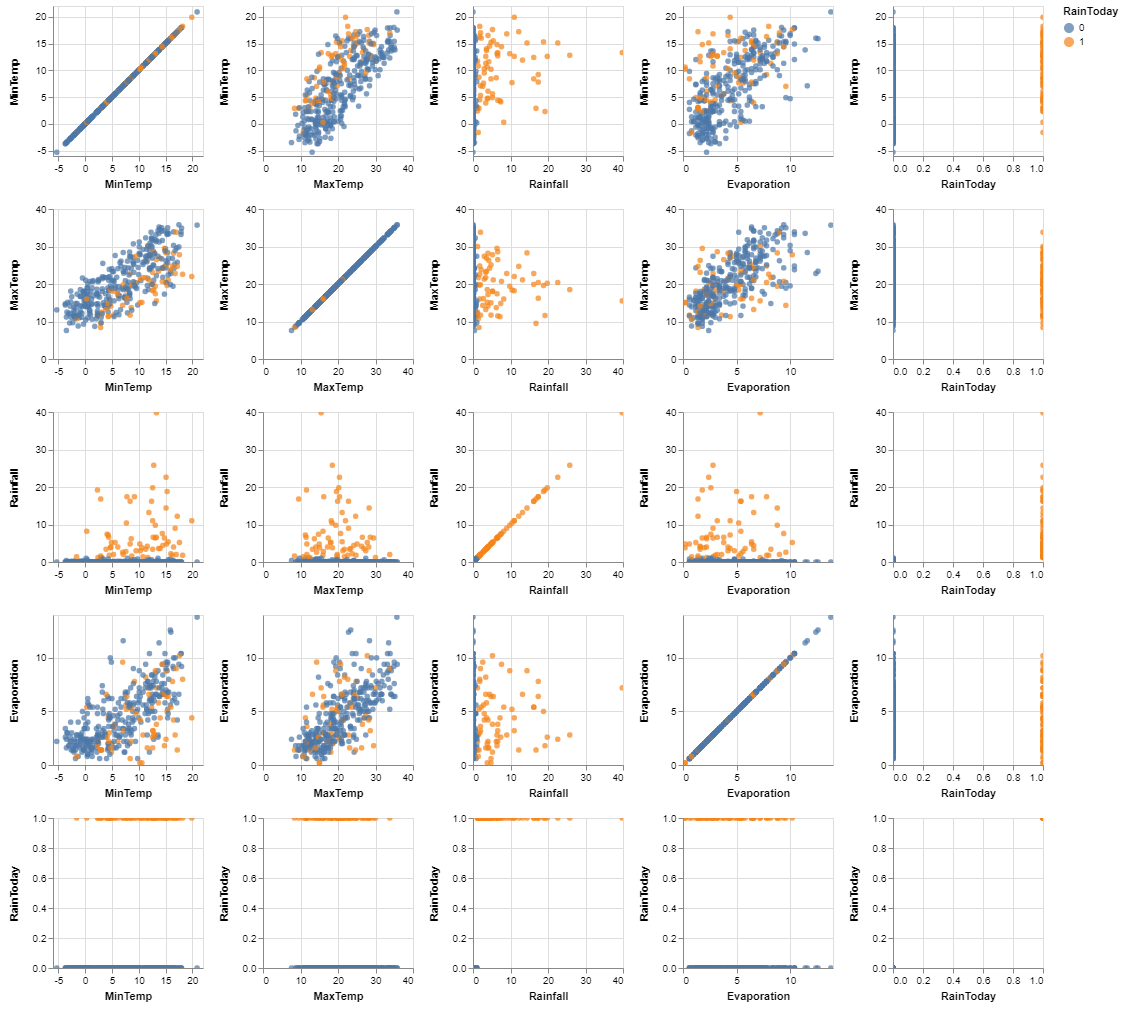

In [34]:
source = weather_num

alt.Chart(source).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='RainToday:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','RainToday'],
#        'WindGustSpeed', 'WindSpeed9am', 'Pressure9am', 'Pressure3pm',
#        'Temp9am', 'Temp3pm', 'RISK_MM', 'RainToday', 'Sunshine', 'RainTomorrow'],
    column=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','RainToday'],
#        'WindGustSpeed', 'WindSpeed9am', 'Pressure9am', 'Pressure3pm',
#        'Temp9am', 'Temp3pm', 'RISK_MM', 'RainToday', 'Sunshine', 'RainTomorrow'],
).interactive()